# Genome info for complete genomes

In [7]:
#Upload libraries
library(ggplot2)
library(readr)

#upload data
complete_genomes_dataset <- read_delim("microbiota_sialylation/genomes_download/plots_data/accession_complete_fields.tsv", 
                                                   delim = "\t", escape_double = FALSE, 
                                                   trim_ws = TRUE)
head(complete_genomes_dataset)
colnames(complete_genomes_dataset)

Rows: 36353 Columns: 11
── Column specification ──────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): Assembly Accession, Assembly BioSample Geographic location, Assembl...
dbl (4): Assembly Stats GC Percent, Assembly Stats Total Sequence Length, Or...
lgl (1): Organelle Assembly Name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Assembly Accession,Assembly BioSample Geographic location,Assembly BioSample Host,Assembly BioSample Host disease,Assembly BioSample Source type,Assembly Stats GC Percent,Assembly Stats Total Sequence Length,Organelle Assembly Name,Organism Name,Organism Taxonomic ID,Annotation Count Gene Protein-coding
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>
GCF_000007745.1,NA,NA,NA,NA,42.5,2314078,NA,[Mannheimia] succiniciproducens MBEL55E,221988,2077
GCF_000007945.1,NA,NA,NA,NA,38.0,1698955,NA,[Haemophilus] ducreyi 35000HP,233412,1525
GCF_000008505.1,NA,NA,NA,NA,35.5,5314794,NA,[Bacillus thuringiensis] serovar konkukian str. 97-27,281309,5232
GCF_000010825.1,NA,NA,NA,NA,53.0,3340249,NA,Acetobacter pasteurianus IFO 3283-01,634452,2933
GCF_000010845.1,NA,NA,NA,NA,53.0,3339669,NA,Acetobacter pasteurianus IFO 3283-03,634453,2931
GCF_000010945.1,NA,NA,NA,NA,53.0,3247995,NA,Acetobacter pasteurianus IFO 3283-01-42C,634458,2872


[1] "Assembly Accession"                    
 [2] "Assembly BioSample Geographic location"
 [3] "Assembly BioSample Host"               
 [4] "Assembly BioSample Host disease"       
 [5] "Assembly BioSample Source type"        
 [6] "Assembly Stats GC Percent"             
 [7] "Assembly Stats Total Sequence Length"  
 [8] "Organelle Assembly Name"               
 [9] "Organism Name"                         
[10] "Organism Taxonomic ID"                 
[11] "Annotation Count Gene Protein-coding"

## Plot for genome length in complete genomes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


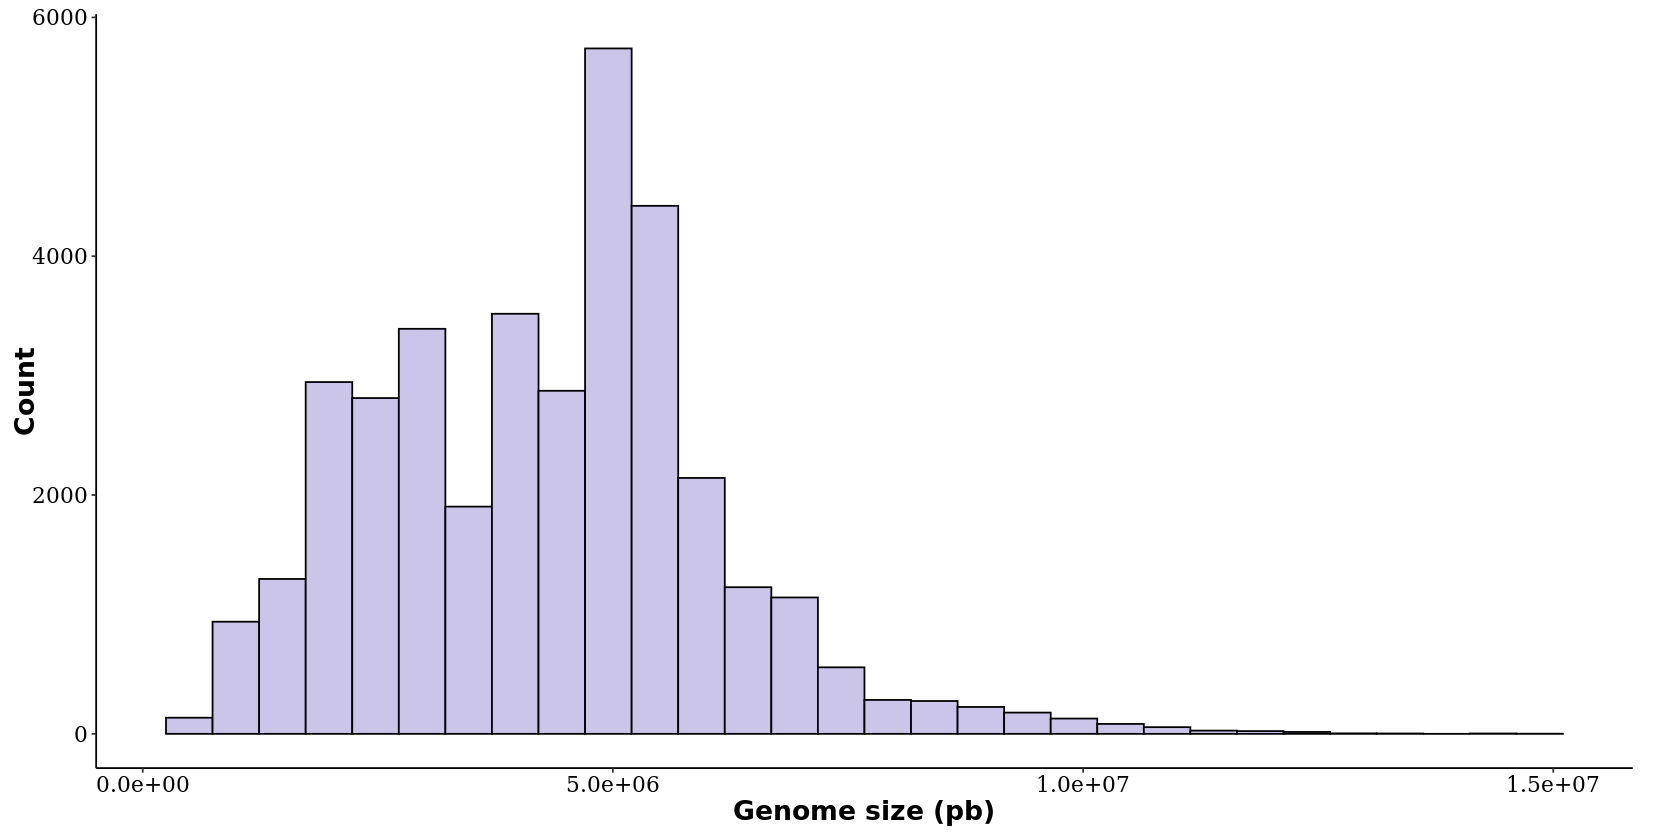

In [8]:
genome_complete_sia_phylo <-ggplot(complete_genomes_dataset, aes(x= complete_genomes_dataset$`Assembly Stats Total Sequence Length`)) + 
  geom_histogram(color="black", fill="#CBC5EA") +  
  theme(axis.text.x=element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text.y = element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text = element_text(size = 13, colour = "black", family = "Times"),
        axis.title=element_text(size=16,face="bold"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"), plot.margin = unit(c(3,10,3,3), units = "mm")) + labs(y= "Count", x = "Genome size (pb)")

options(repr.plot.width = 14, repr.plot.height = 7)
print(genome_complete_sia_phylo)

## Plot for G+C content in complete genomes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


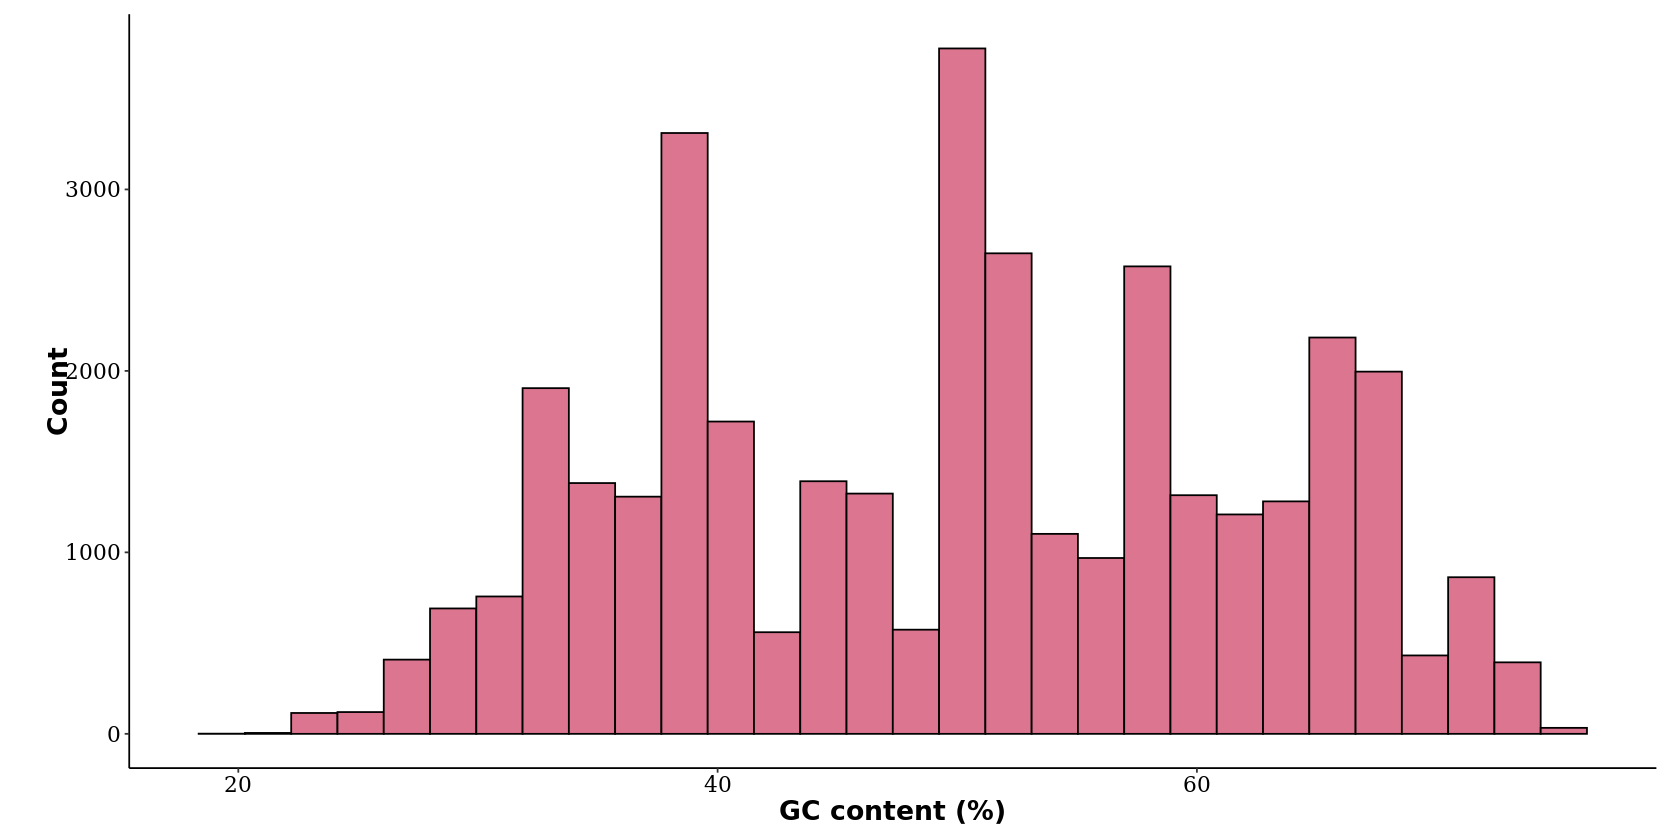

In [9]:
gc_complete_sia_phylo <-ggplot(complete_genomes_dataset, aes(x=complete_genomes_dataset$`Assembly Stats GC Percent`)) + 
  geom_histogram(color="black", fill="#DC758F") +  
  theme(axis.text.x=element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text.y = element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text = element_text(size = 13, colour = "black", family = "Times"),
        axis.title=element_text(size=16,face="bold"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"), plot.margin = unit(c(3,5,3,10), units = "mm")) + labs(y= "Count", x = "GC content (%)")

options(repr.plot.width = 14, repr.plot.height = 7)
print(gc_complete_sia_phylo)

## Plot for CDS in complete genomes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


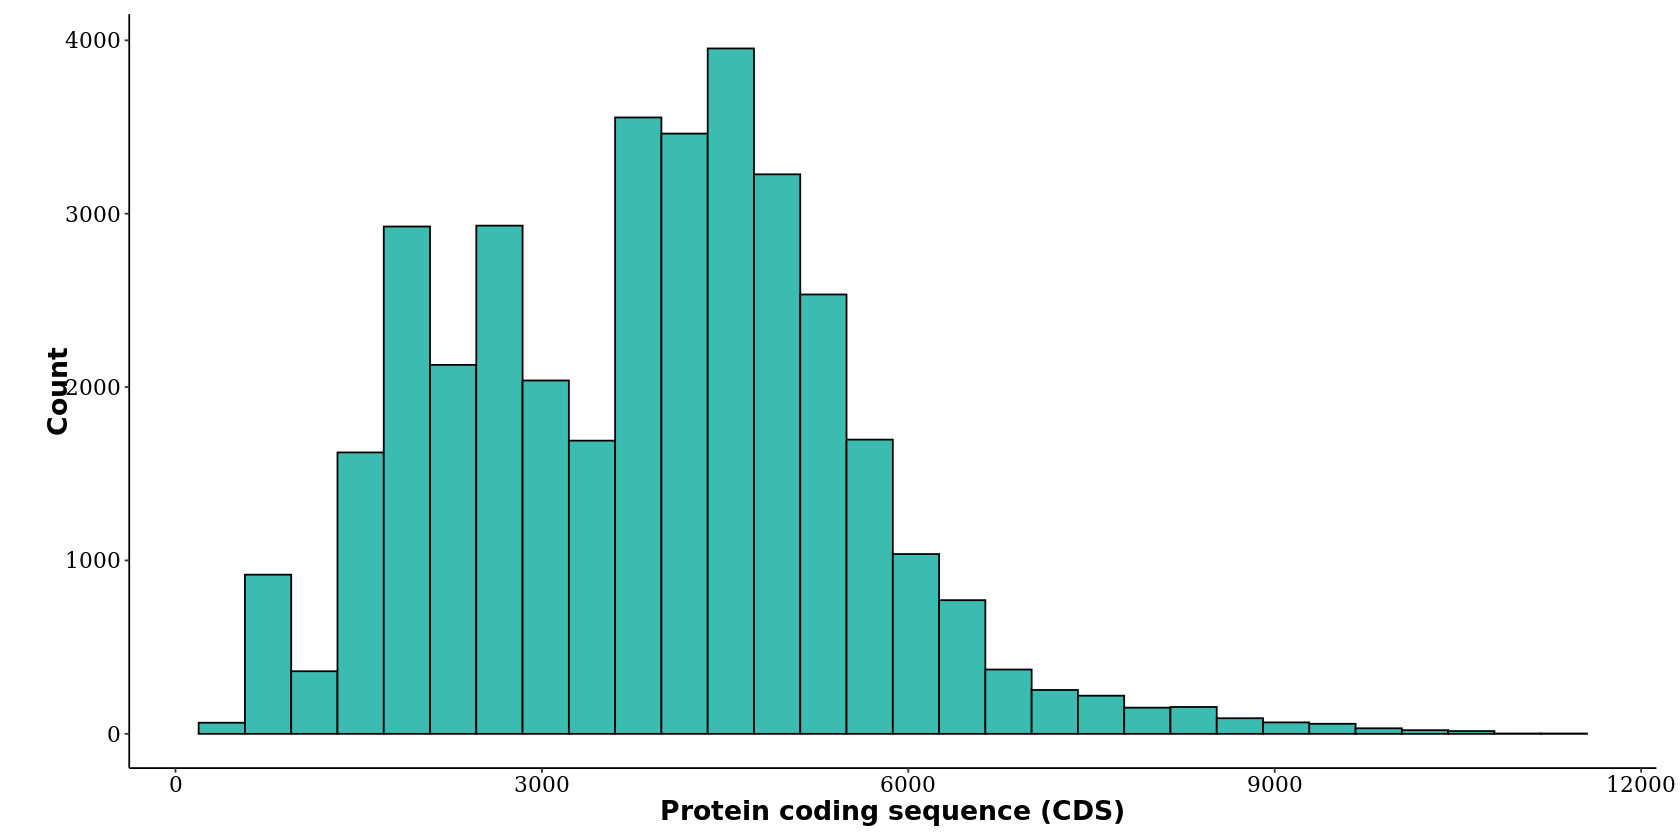

In [10]:
CDS_complete_sia_phylo <-ggplot(complete_genomes_dataset, aes(x=complete_genomes_dataset$`Annotation Count Gene Protein-coding`)) + 
  geom_histogram(color="black", fill="#3CBBB1") +  
  theme(axis.text.x=element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text.y = element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text = element_text(size = 13, colour = "black", family = "Times"),
        axis.title=element_text(size=16,face="bold"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"), plot.margin = unit(c(3,5,3,10), units = "mm")) +
  labs(y= "Count", x = "Protein coding sequence (CDS)") 

print(CDS_complete_sia_phylo)

## Join plots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


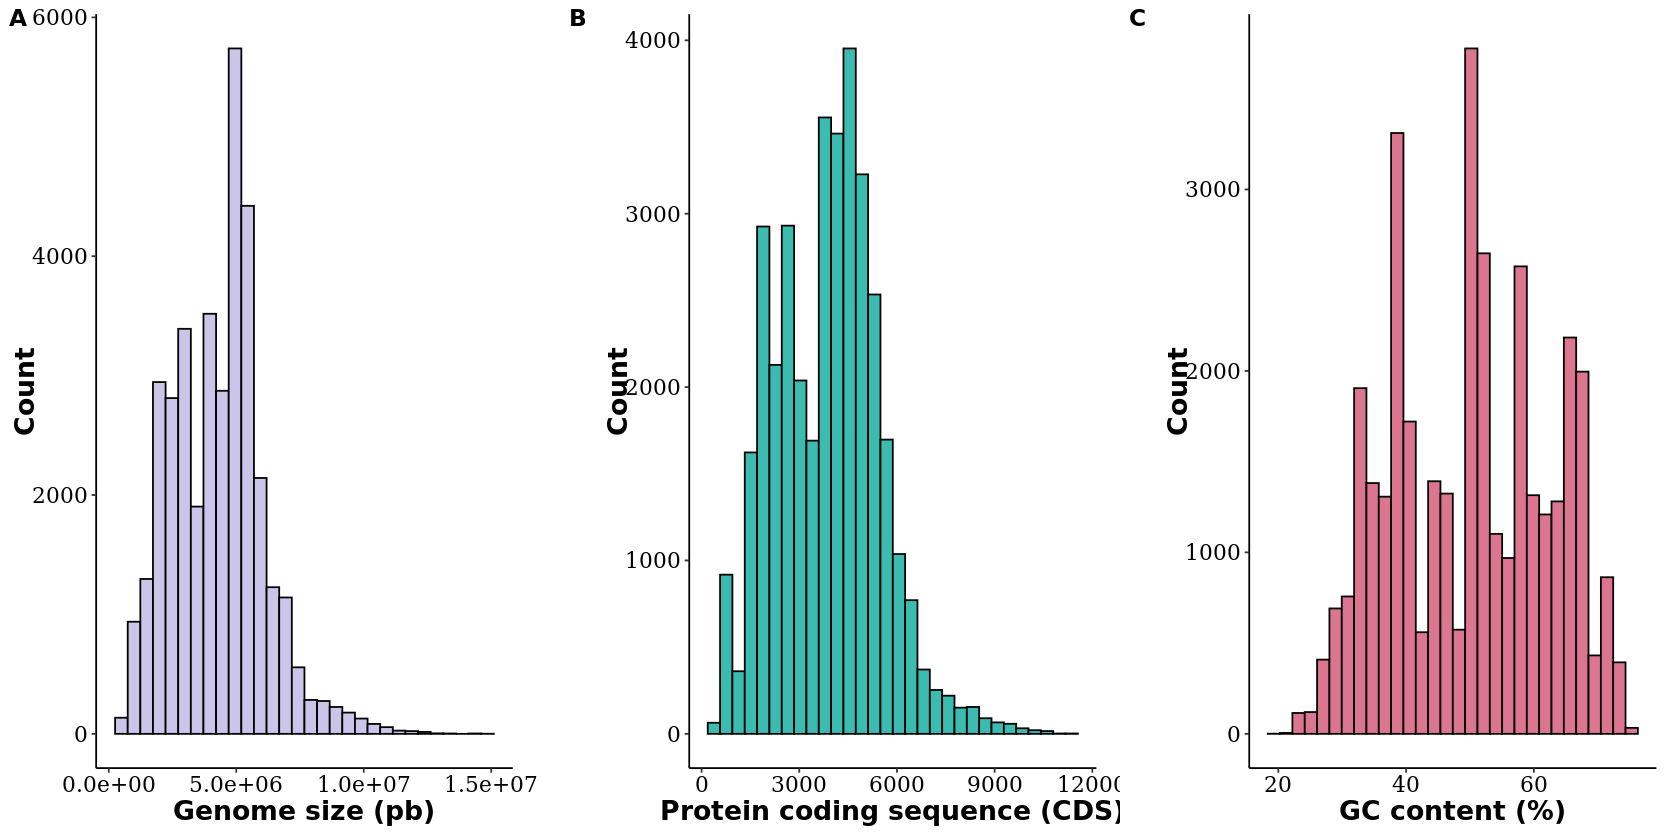

In [11]:
library(ggpubr)

options(repr.plot.width = 14, repr.plot.height = 7)
ggarrange(genome_complete_sia_phylo, CDS_complete_sia_phylo, gc_complete_sia_phylo, labels = c("A", "B", "C"), nrow = 1, ncol = 3)

# Genome info for genomes with sialylation pathway

In [12]:
#Upload data
comm_complete_genomes_dataset_fields <- read_delim("microbiota_sialylation/genomes_download/plots_data/comm_complete_genomes_dataset_fields.tsv", 
                                                   delim = "\t", escape_double = FALSE, 
                                                   trim_ws = TRUE)
head(comm_complete_genomes_dataset_fields)
colnames(comm_complete_genomes_dataset_fields)

Rows: 3171 Columns: 11
── Column specification ──────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): Assembly Accession, Assembly BioSample Geographic location, Assembl...
dbl (4): Assembly Stats GC Percent, Assembly Stats Total Sequence Length, Or...
lgl (1): Organelle Assembly Name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Assembly Accession,Assembly BioSample Geographic location,Assembly BioSample Host,Assembly BioSample Host disease,Assembly BioSample Source type,Assembly Stats GC Percent,Assembly Stats Total Sequence Length,Organelle Assembly Name,Organism Name,Organism Taxonomic ID,Annotation Count Gene Protein-coding
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>
GCF_000801145.1,unknown,NA,NA,NA,40.5,2431533,NA,Actinobacillus equuli subsp. equuli,202947,2194
GCF_009676805.1,China:Henan,swine,NA,NA,41.5,2979276,NA,Acinetobacter towneri,202956,2713
GCF_016756395.1,"Japan:Gunma, Kurabuchi Village",NA,NA,NA,73.5,8972903,NA,Actinacidiphila reveromycinica,659352,7181
GCF_019046965.1,Germany: Braunschweig,missing,Unknown,NA,39.0,3838032,NA,Acinetobacter pittii,48296,3488
GCF_022459075.1,Belgium,Homo sapiens,NA,NA,39.0,3638126,NA,Acinetobacter baumannii,470,3255
GCF_029582015.1,Poland,White Stork,unknown,NA,39.0,3836532,NA,Acinetobacter baumannii,470,3478


[1] "Assembly Accession"                    
 [2] "Assembly BioSample Geographic location"
 [3] "Assembly BioSample Host"               
 [4] "Assembly BioSample Host disease"       
 [5] "Assembly BioSample Source type"        
 [6] "Assembly Stats GC Percent"             
 [7] "Assembly Stats Total Sequence Length"  
 [8] "Organelle Assembly Name"               
 [9] "Organism Name"                         
[10] "Organism Taxonomic ID"                 
[11] "Annotation Count Gene Protein-coding"

## Genome length

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


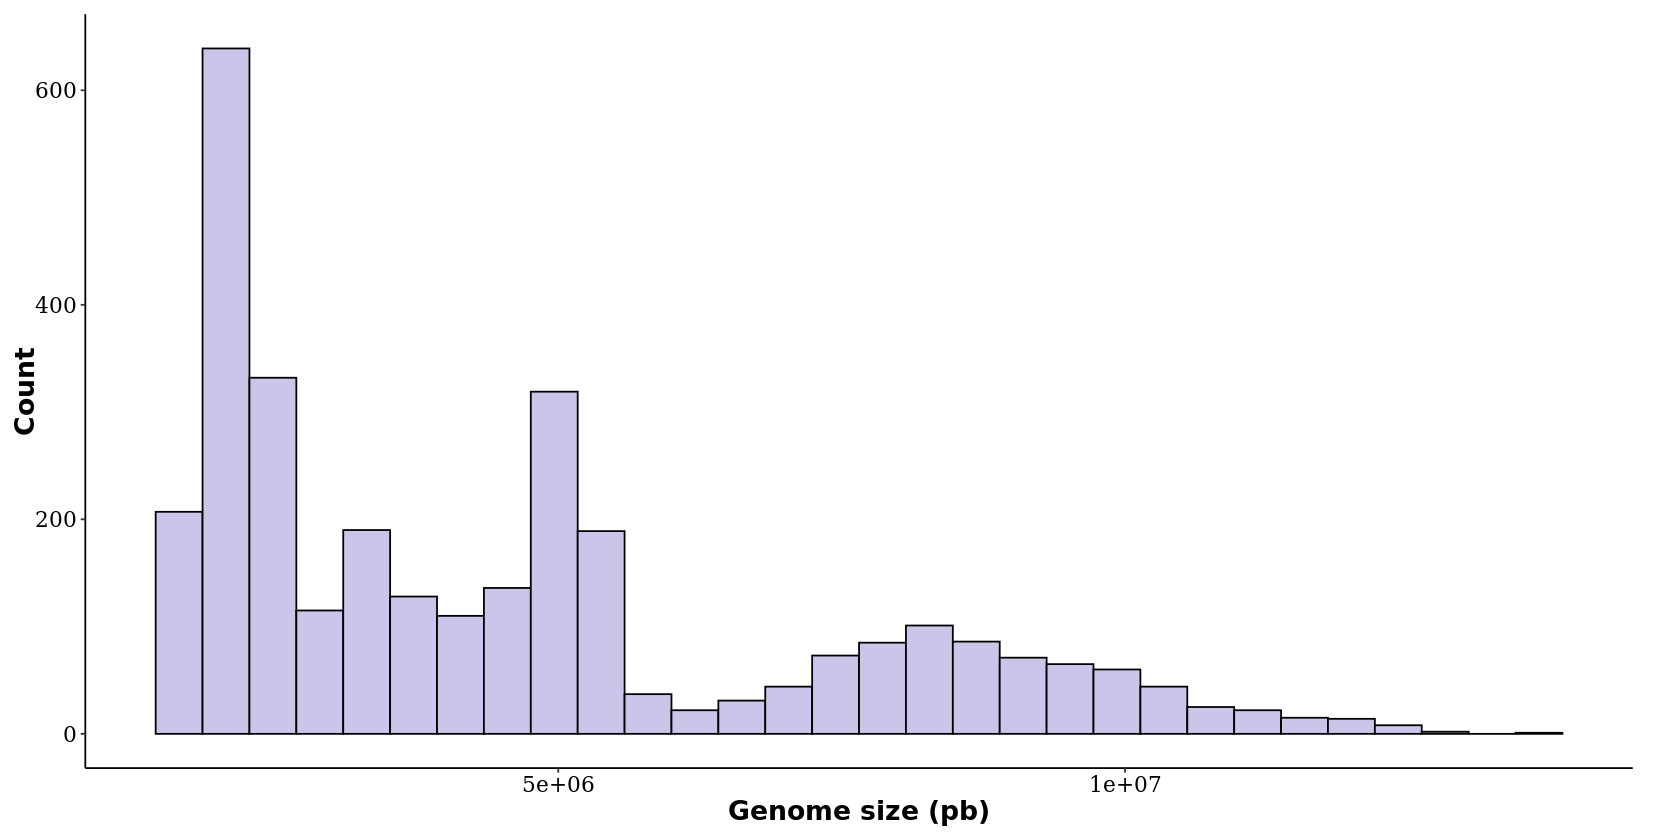

In [13]:
genome_comm_sia_phylo <-ggplot(comm_complete_genomes_dataset_fields, aes(x= comm_complete_genomes_dataset_fields$`Assembly Stats Total Sequence Length`)) + 
  geom_histogram(color="black", fill="#CBC5EA") +  
  theme(axis.text.x=element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text.y = element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text = element_text(size = 13, colour = "black", family = "Times"),
        axis.title=element_text(size=16,face="bold"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"), plot.margin = unit(c(3,10,3,3), units = "mm")) + labs(y= "Count", x = "Genome size (pb)")

options(repr.plot.width = 14, repr.plot.height = 7)
print(genome_comm_sia_phylo)

## G+C content

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


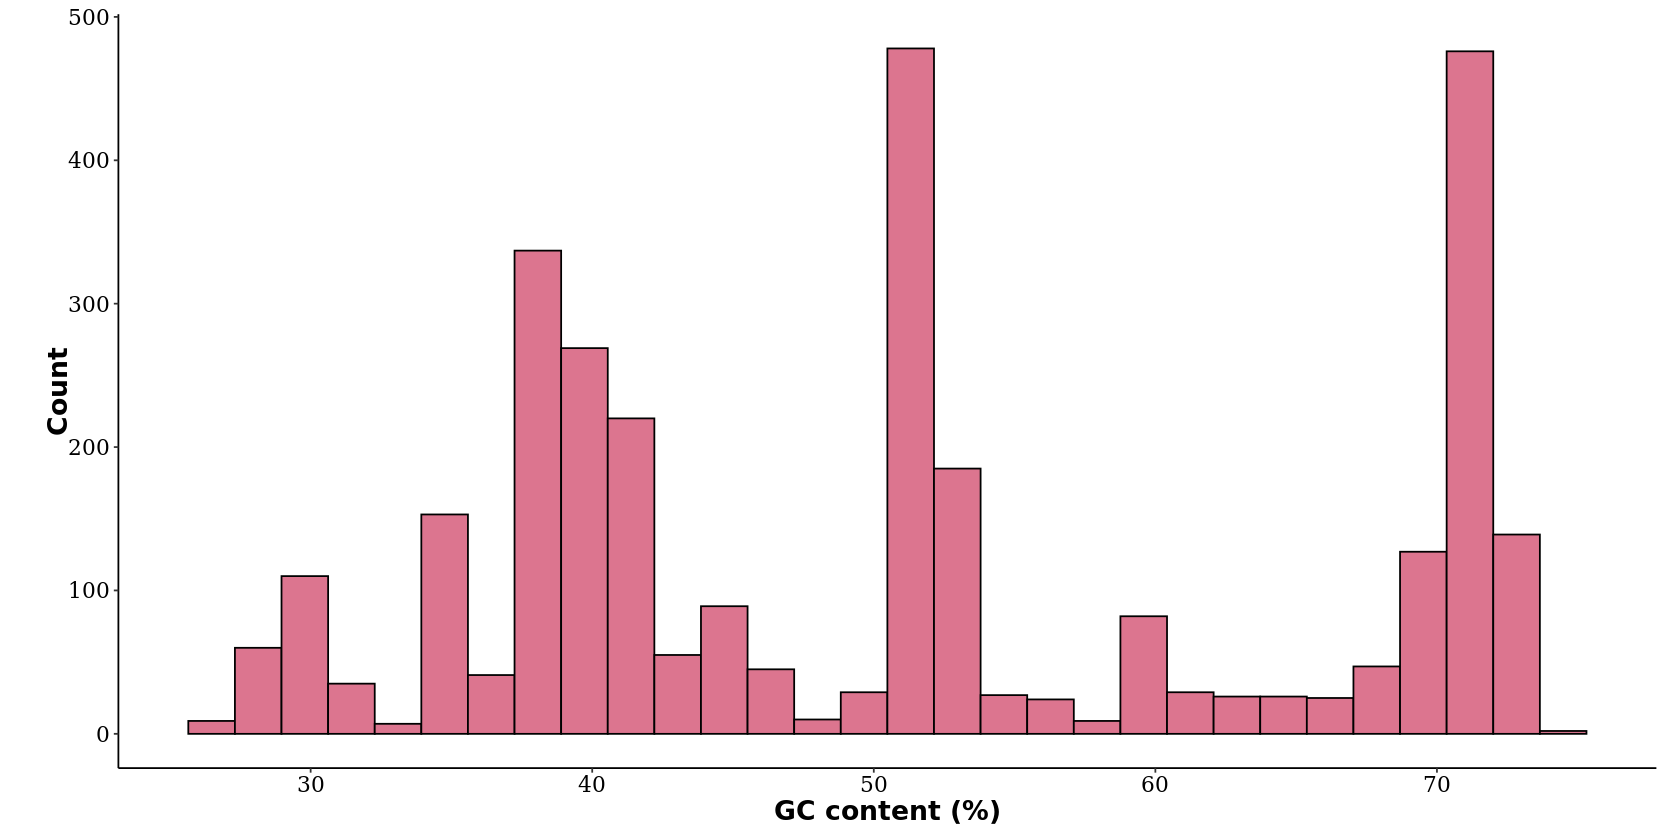

In [14]:
gc_comm_sia_phylo <-ggplot(comm_complete_genomes_dataset_fields, aes(x=comm_complete_genomes_dataset_fields$`Assembly Stats GC Percent`)) + 
  geom_histogram(color="black", fill="#DC758F") +  
  theme(axis.text.x=element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text.y = element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text = element_text(size = 13, colour = "black", family = "Times"),
        axis.title=element_text(size=16,face="bold"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"), plot.margin = unit(c(3,5,3,10), units = "mm")) + labs(y= "Count", x = "GC content (%)")

options(repr.plot.width = 14, repr.plot.height = 7)
print(gc_comm_sia_phylo)

## CDS

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


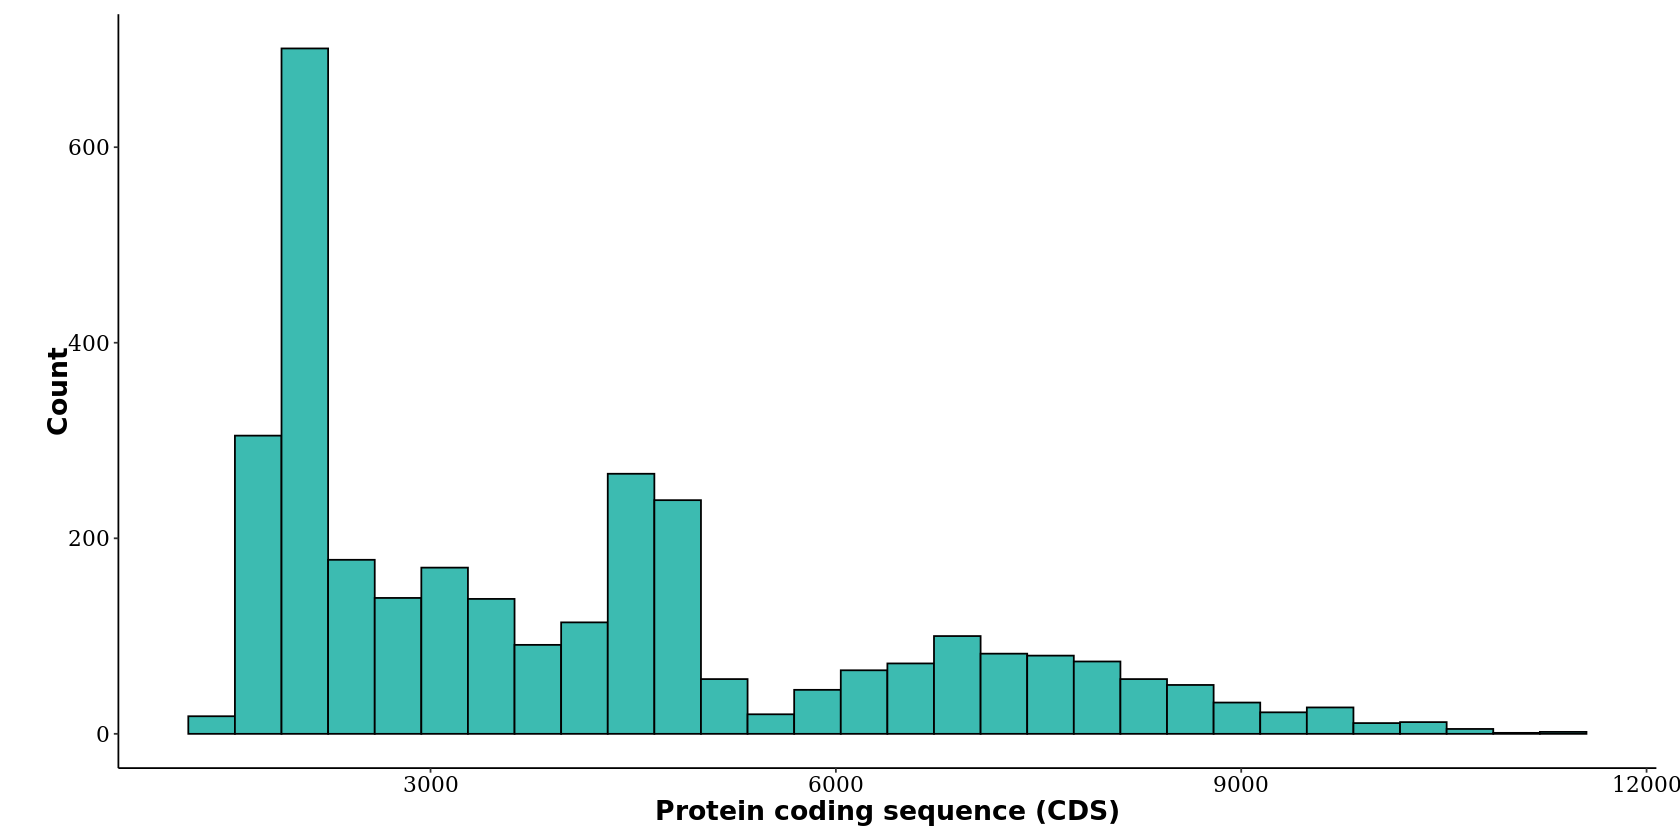

In [15]:
CDS_comm_sia_phylo <-ggplot(comm_complete_genomes_dataset_fields, aes(x=comm_complete_genomes_dataset_fields$`Annotation Count Gene Protein-coding`)) + 
  geom_histogram(color="black", fill="#3CBBB1") +  
  theme(axis.text.x=element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text.y = element_text(angle = 0, size = 13, colour = "black", family = "Times"),
        axis.text = element_text(size = 13, colour = "black", family = "Times"),
        axis.title=element_text(size=16,face="bold"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"), plot.margin = unit(c(3,5,3,10), units = "mm")) +
  labs(y= "Count", x = "Protein coding sequence (CDS)") 

options(repr.plot.width = 14, repr.plot.height = 7)
print(CDS_comm_sia_phylo)

## Join plots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


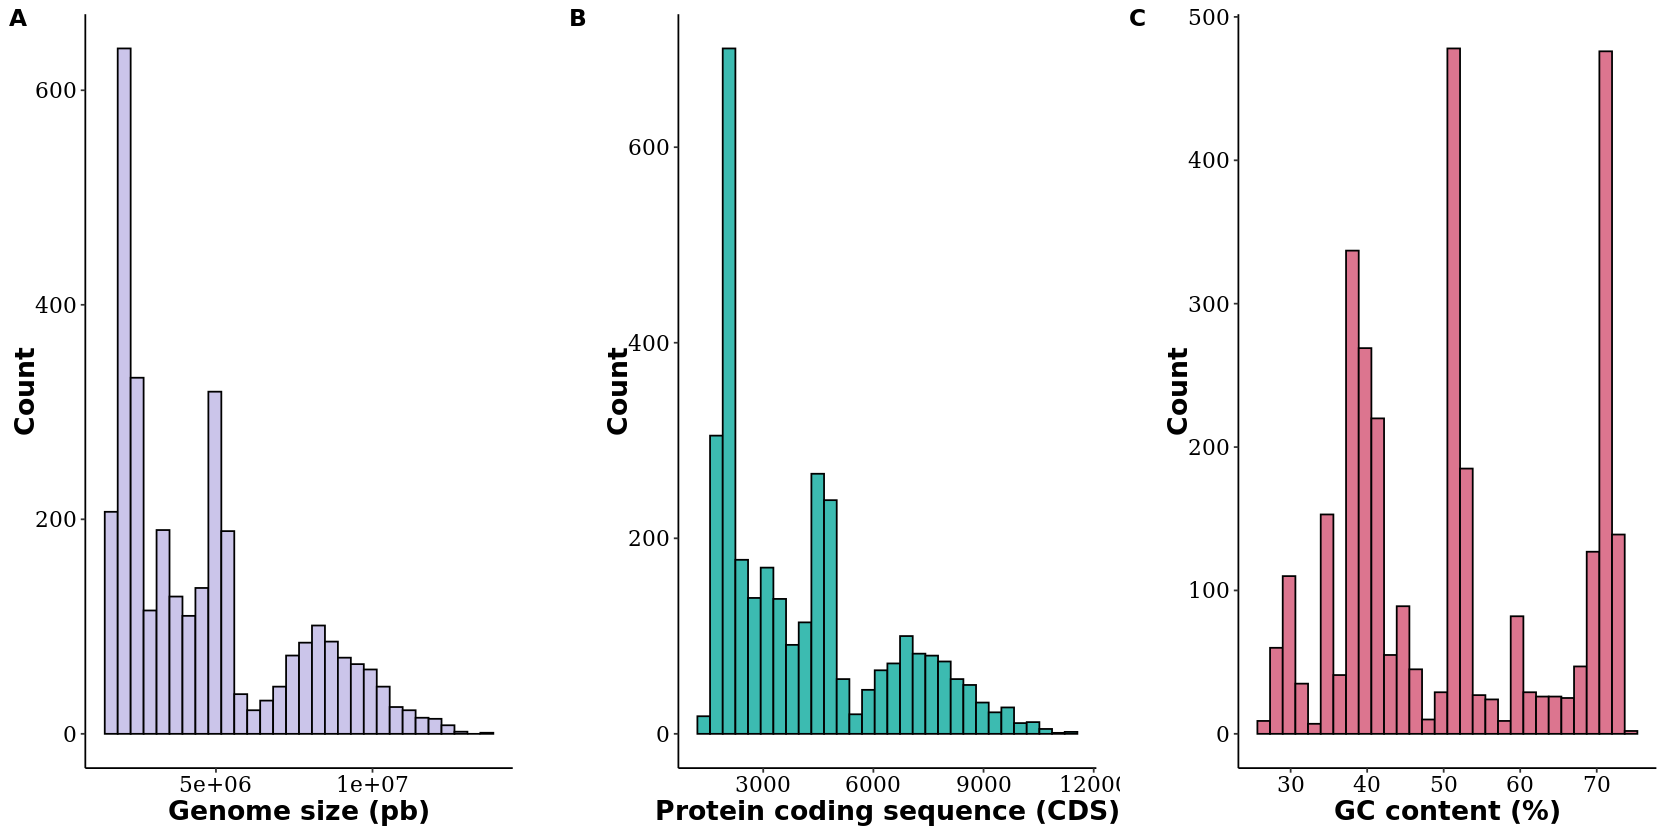

In [16]:
options(repr.plot.width = 14, repr.plot.height = 7)
ggarrange(genome_comm_sia_phylo, CDS_comm_sia_phylo, gc_comm_sia_phylo, labels = c("A", "B", "C"), nrow = 1, ncol = 3)